In [1]:
#importing  Required Libraries
import pandas as pd
import numpy as np
##Import the library to implement K-means
from sklearn.cluster import KMeans
##Import the library to calculate the silhouette score
from sklearn.metrics import silhouette_score
# Import TFID to Transform text in to vector 
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
# convertion of dense to sparse matrix
from scipy.sparse import csr_matrix
from matplotlib import pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
#Importing required modules for pca Dimentionality reduction
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
## To check the performance of each model
from datetime import datetime
# import module for recurrsion limit
import sys
#from matplotlib import pyplot as plt
# Import library for Agglomerative clustering 
from sklearn.cluster import AgglomerativeClustering
# Import library for hierarchial clustering 
import scipy.cluster.hierarchy as sch
#from datetime import datetime
# Import library for NearestNeighbors
from sklearn.neighbors import NearestNeighbors
# Import library for DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture # for GMM clustering
from sklearn import metrics # for calculating Silhouette score

In [2]:
#To Read csv file
dataframe = pd.read_csv('/Users/sanjukarthick/Desktop/Flask/Modified_SQL_Dataset.csv',encoding='utf-8')
dataframe

,Sentence,Label,Unnamed: 2,Unnamed: 3
0,""" or pg_sleep ( __TIME__ ) --",1,NaN,NaN
1,create user name identified by pass123 tempora...,NaN,1,NaN
2,AND 1 = utl_inaddr.get_host_address ( ...,1,NaN,NaN
3,select * from users where id = '1' or @ @1 ...,1,NaN,NaN
4,"select * from users where id = 1 or 1#"" ( ...",1,NaN,NaN
...,...,...,...,...
30914,DELETE FROM door WHERE grow = 'small',0,NaN,NaN
30915,DELETE FROM tomorrow,0,NaN,NaN
30916,SELECT wide ( s ) FROM west,0,NaN,NaN
30917,SELECT * FROM ( SELECT slide FROM breath ),0,NaN,NaN


In [3]:
# dropping column 2, column 3
data=dataframe.drop(['Unnamed: 2', 'Unnamed: 3'], axis=1)
#Droping rows with NaN 
df = data.dropna()
df

,Sentence,Label
0,""" or pg_sleep ( __TIME__ ) --",1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1
5,select name from syscolumns where id = ...,1
...,...,...
30914,DELETE FROM door WHERE grow = 'small',0
30915,DELETE FROM tomorrow,0
30916,SELECT wide ( s ) FROM west,0
30917,SELECT * FROM ( SELECT slide FROM breath ),0


In [4]:
#to check unique values 
df.Label.nunique()

28

In [5]:
#to check the count of unique values 
df['Label'].value_counts()

0                                                                         19268
1                                                                         11341
 --                                                                          11
waitfor delay '0:0:__TIME__'--                                                4
 DROP TABLE Suppliers                                                         2
 CREATE VIEW [Products Above Average Price] AS                                1
 SELECT * FROM Customers                                                      1
 /*Select all the columns of all the records in the Customers table:*/        1
 grant resource to name                                                       1
 drop table temp --                                                           1
SELECT *                                                                      1
SELECT * FROM Customers                                                       1
*/                                      

In [9]:
#Adding new columns to match 1 and 0
df.loc[df['Label'] == '1' , "name_match"] = 'Match'
df.loc[df['Label'] == '0' , "name_match"] = 'Match'  
df

/Users/sanjukarthick/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/sanjukarthick/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,Sentence,Label,name_match
0,""" or pg_sleep ( __TIME__ ) --",1,Match
2,AND 1 = utl_inaddr.get_host_address ( ...,1,Match
3,select * from users where id = '1' or @ @1 ...,1,Match
4,"select * from users where id = 1 or 1#"" ( ...",1,Match
5,select name from syscolumns where id = ...,1,Match
...,...,...,...
30914,DELETE FROM door WHERE grow = 'small',0,Match
30915,DELETE FROM tomorrow,0,Match
30916,SELECT wide ( s ) FROM west,0,Match
30917,SELECT * FROM ( SELECT slide FROM breath ),0,Match


In [10]:
#To check the count of name_match 
df['name_match'].value_counts()

Match    30609
Name: name_match, dtype: int64

In [11]:
# Classifying Match Columns
options = ['Match'] 
# selecting rows based on condition 
df1 = df.loc[df['name_match'].isin(options)] 
df1

,Sentence,Label,name_match
0,""" or pg_sleep ( __TIME__ ) --",1,Match
2,AND 1 = utl_inaddr.get_host_address ( ...,1,Match
3,select * from users where id = '1' or @ @1 ...,1,Match
4,"select * from users where id = 1 or 1#"" ( ...",1,Match
5,select name from syscolumns where id = ...,1,Match
...,...,...,...
30914,DELETE FROM door WHERE grow = 'small',0,Match
30915,DELETE FROM tomorrow,0,Match
30916,SELECT wide ( s ) FROM west,0,Match
30917,SELECT * FROM ( SELECT slide FROM breath ),0,Match


In [12]:
#To Remove the unwanted column name_match from the dataset
data=df1.drop(['name_match'], axis= 1)
data

,Sentence,Label
0,""" or pg_sleep ( __TIME__ ) --",1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1
5,select name from syscolumns where id = ...,1
...,...,...
30914,DELETE FROM door WHERE grow = 'small',0
30915,DELETE FROM tomorrow,0
30916,SELECT wide ( s ) FROM west,0
30917,SELECT * FROM ( SELECT slide FROM breath ),0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30609 entries, 0 to 30918
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  30609 non-null  object
 1   Label     30609 non-null  object
dtypes: object(2)
memory usage: 717.4+ KB


In [14]:
# Check the missing values
data.isnull().sum()

Sentence    0
Label       0
dtype: int64

In [15]:
# To check the values of 0 and 1 from the dataset 
data['Label'].value_counts()

0    19268
1    11341
Name: Label, dtype: int64

/Users/sanjukarthick/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Label', ylabel='count'>

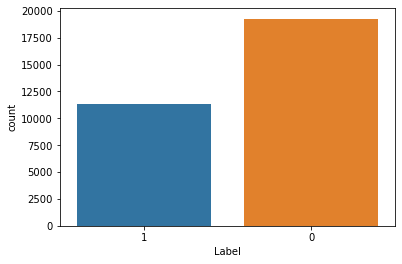

In [16]:
#Box plot to visualise the dataset 
sns.countplot(data['Label'])

In [18]:
### Classifying the dataset to Normal and Injected And working only on Injected queries 

In [19]:
# Classifying Normal queries
options = ['0'] 
# selecting rows based on condition 
normal_df = data.loc[data['Label'].isin(options)] 
#print('\nResult dataframe :\n', rslt_df)
normal_df

,Sentence,Label
11330,99745017c,0
11331,ejerci78,0
11332,47209,0
11333,"calle valencia de don juan 161, 7?d",0
11334,b3r3al,0
...,...,...
30914,DELETE FROM door WHERE grow = 'small',0
30915,DELETE FROM tomorrow,0
30916,SELECT wide ( s ) FROM west,0
30917,SELECT * FROM ( SELECT slide FROM breath ),0


In [20]:
# Classifying Injected  queries
options = ['1'] 
# selecting rows based on condition 
injected_df = data.loc[data['Label'].isin(options)] 
injected_df


,Sentence,Label
0,""" or pg_sleep ( __TIME__ ) --",1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1
5,select name from syscolumns where id = ...,1
...,...,...
19330,â or 1 = 1 --,1
19331,or 'x' = 'x,1
19332,29%,1
19333,28%,1


In [21]:
#  5% of data to be taken from original dataset which is used for prediction
data1 = injected_df.sample(frac=0.95, random_state=None)
data1_unseen = injected_df.drop(data1.index)
data1.reset_index(inplace=True, drop=True)
data1_unseen.reset_index(inplace=True, drop=True)
# print the revised shape
print('Data for Modeling: ' + str(data1.shape))
print('Data For Predictions: ' + str(data1_unseen.shape))

Data for Modeling: (10774, 2)
Data For Predictions: (567, 2)


In [22]:
# 5% of data for prediction from original dataframe

In [23]:
predict_data = data1_unseen
predict_data

,Sentence,Label
0,distinct,1
1,select * from users where id = 1 union sele...,1
2,"select * from users where id = 1 or "".]"" or...",1
3,"select * from users where id = 1 or 1#""? or...",1
4,declare @q nvarchar ( 200 ) select @q ...,1
...,...,...
562,1' in boolean mode ) procedure analyse ( ...,1
563,1' ) as idqc where 5288 = 5288 and elt (...,1
564,1 ) ) ) union all select null--,1
565,"1"" ) rlike ( select * from ( select ...",1


In [24]:
features_predict = predict_data['Sentence']  
#target = data['Label']
features_predict

0                                               distinct
1       select * from users where id  =  1 union sele...
2       select * from users where id  =  1 or ".]" or...
3       select * from users where id  =  1 or 1#"? or...
4      declare @q nvarchar   (  200  )   select @q   ...
                             ...                        
562    1' in boolean mode  )   procedure analyse  (  ...
563    1'  )   as idqc where 5288  =  5288 and elt  (...
564           1   )    )     )   union all select null--
565    1"  )   rlike   (  select * from   (  select  ...
566                                        or 'x'  =  'x
Name: Sentence, Length: 567, dtype: object

In [25]:
# Convert the features into array
vectorizer = TfidfVectorizer(min_df =100, max_df = 0.8, stop_words = stopwords.words('english'), ngram_range=(1, 1),max_features=1500)
featureseries_test = vectorizer.fit_transform(features_predict)
featureseries_test

<567x2 sparse matrix of type '<class 'numpy.float64'>'
	with 453 stored elements in Compressed Sparse Row format>

In [26]:
# convert to sparse matrix (CSR method)
matrixsparse_test = csr_matrix(featureseries_test)
#matrixsparse_basic = csr_matrix(X)
Features_test = matrixsparse_test
#Features1= Features
print(Features_test)

  (1, 1)	0.6692398168349705
  (1, 0)	0.7430464773906779
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 0)	1.0
  (5, 0)	1.0
  (8, 1)	0.6692398168349705
  (8, 0)	0.7430464773906779
  (9, 0)	1.0
  (11, 0)	1.0
  (13, 1)	0.6692398168349705
  (13, 0)	0.7430464773906779
  (14, 0)	1.0
  (15, 1)	0.6692398168349705
  (15, 0)	0.7430464773906779
  (17, 0)	1.0
  (18, 0)	1.0
  (19, 1)	0.6692398168349705
  (19, 0)	0.7430464773906779
  (20, 0)	1.0
  (21, 1)	0.6692398168349705
  (21, 0)	0.7430464773906779
  (22, 0)	1.0
  (23, 1)	0.6692398168349705
  (23, 0)	0.7430464773906779
  :	:
  (526, 0)	1.0
  (527, 0)	1.0
  (530, 0)	1.0
  (534, 0)	1.0
  (535, 1)	0.8743106716870934
  (535, 0)	0.4853667163846977
  (539, 0)	1.0
  (542, 1)	0.8743106716870934
  (542, 0)	0.4853667163846977
  (543, 0)	1.0
  (545, 0)	1.0
  (550, 0)	1.0
  (551, 1)	0.8743106716870934
  (551, 0)	0.4853667163846977
  (552, 0)	1.0
  (553, 0)	1.0
  (554, 0)	1.0
  (556, 0)	1.0
  (558, 1)	0.8743106716870934
  (558, 0)	0.4853667163846977
  (560, 0)	1.0
  (561, 

In [27]:
# reconstruct dense matrix
dense_test = featureseries_test.todense()
print(dense_test)

[[0.         0.        ]
 [0.74304648 0.66923982]
 [1.         0.        ]
 ...
 [0.48536672 0.87431067]
 [1.         0.        ]
 [0.         0.        ]]


In [28]:
#Remaining 95% of dataset for modelling
data1

,Sentence,Label
0,1'+ ( select 'suzs' where 2905 = 2905 and ...,1
1,1'|| ( select 'ovlx' where 8767 = 8767 or ...,1
2,"-6965' ) union all select 2857,2857,2857,28...",1
3,-9975 where 9760 = 9760 order by 1--,1
4,"1"" ) as vqkz where 8536 = 8536",1
...,...,...
10769,"1"" where 2989 = 2989 or 8421 = ( select...",1
10770,"1"" ) as mszg where 6184 = 6184 rlike slee...",1
10771,"-1512 union all select 9013,9013,9013,9013#",1
10772,1' ) ) as qswu where 6377 = 6377,1


###### ###In order to demonstrate the use of the prediction function on unseen data, a sample of 567 records (~5%) has been withheld from the original dataset to be used for predictions at the end. Another way to think about this is that these 567 are not available at the time of training of machine learning models

###Declare feature vector and target variable##

## There is no target as it is unsupervised Machine learning (unlabelled dataset )

In [29]:
features = data1['Sentence']  
#target = data['Label']

In [30]:
# Convert the features into array
vectorizer = TfidfVectorizer(min_df =100, max_df = 0.8, stop_words = stopwords.words('english'), ngram_range=(1, 1),max_features=1500)
featureseries = vectorizer.fit_transform(features)
featureseries

<10774x118 sparse matrix of type '<class 'numpy.float64'>'
	with 49554 stored elements in Compressed Sparse Row format>

###In order to demonstrate the use of the predict_model function on unseen data, a sample of 1530 records (~5%) has been withheld from the original dataset to be used for predictions at the end. Another way to think about this is that these 1530  are not available at the time of training of machine learning models.



In [31]:
# convert to sparse matrix (CSR method)
matrixsparse_basic = csr_matrix(featureseries)
#matrixsparse_basic = csr_matrix(X)
Features = matrixsparse_basic
#Features1= Features
print(Features)

  (0, 12)	0.07392250561774834
  (0, 15)	0.1479006875663588
  (0, 55)	0.05820773764065333
  (0, 16)	0.09825900628346464
  (0, 53)	0.05848774256533682
  (0, 17)	0.09825900628346464
  (0, 33)	0.05902031186493691
  (0, 6)	0.07250013067602355
  (0, 8)	0.07117259381318411
  (0, 9)	0.369751718915897
  (0, 35)	0.8747098972992586
  (0, 67)	0.10364595965029018
  (0, 41)	0.11178405046716618
  (0, 89)	0.0875507119408255
  (1, 90)	0.925920955934745
  (1, 89)	0.3777173326191003
  (2, 111)	0.8734776809071689
  (2, 89)	0.48686419149187177
  (3, 75)	1.0
  (6, 99)	0.1331204357914781
  (6, 98)	0.1331204357914781
  (6, 97)	0.1331204357914781
  (6, 96)	0.1331204357914781
  (6, 95)	0.1331204357914781
  (6, 94)	0.1331204357914781
  :	:
  (10766, 89)	0.03337431202121948
  (10767, 69)	0.08900711636642944
  (10767, 99)	0.1325920794636986
  (10767, 98)	0.1325920794636986
  (10767, 97)	0.1325920794636986
  (10767, 96)	0.1325920794636986
  (10767, 95)	0.1325920794636986
  (10767, 94)	0.1325920794636986
  (10767, 9

In [32]:
# reconstruct dense matrix
dense_data = Features.todense()
print(dense_data)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Dimentionality Reduction

##Dimentionality Reduction to fit and speed up the machine learning model
##. I should note that after dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation. 


##When having latent features driving the patterns in data.
##For Dimensionality reduction.
##To visualize high-dimensional data.
##To reduce the noise.
##As a preprocessing step to improve the performance of other algorithms.

In [33]:
#build and plot the Principal Component Analysis (PCA), which shows the class distribution
pca = PCA(2)
## PCA does not take sparse matrix so it is converted to dense matrix to fit in to machine learning model. 
#Transform the data
df = pca.fit_transform(dense_data)
#df = pca.fit_transform(Features)
df.shape

/Users/sanjukarthick/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


(10774, 2)

In [34]:
df

array([[-0.30184805,  0.27065278],
       [ 0.05338397, -0.31123784],
       [ 0.78857194, -0.01496067],
       ...,
       [ 0.78857194, -0.01496067],
       [-0.14386625, -0.02113743],
       [-0.06040926, -0.11956416]])

## Un supervised machine Learning Models 

## K- Means

In [35]:
## To check the performace of K-means model 
## Start Time 
km_starting_time = datetime.now()
print("km start_time is - ", km_starting_time)

km start_time is -  2022-08-24 11:58:07.716487


2
[0 0 1 ... 1 0 0]
0.6284135467264971
3
[2 0 1 ... 1 0 0]
0.7017736409081262
4
[2 0 1 ... 1 0 0]
0.697393824041191


Text(0, 0.5, 'Inertia')

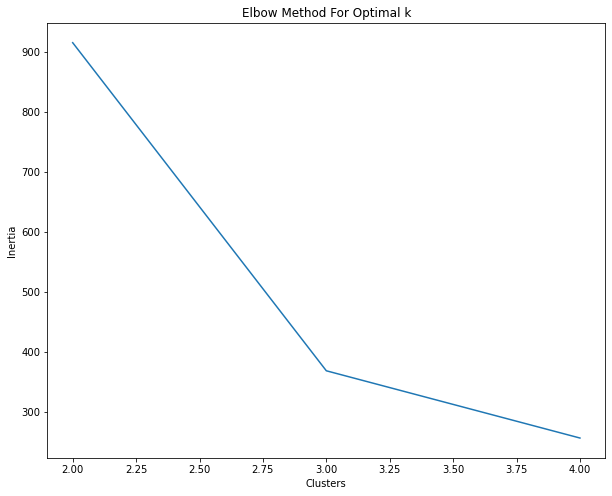

In [36]:
clusters = []
accuracy = []
#s = []
K = [2,3,4]

for i in K:
    print(i)
    km = KMeans(n_clusters=i).fit(df)
    clusters.append(km.inertia_)
    identified_clusters = km.predict(df)
    print(identified_clusters)
    #S.append(metrics.silhouette_score(df, identified_clusters, metric='euclidean'))
    score = silhouette_score(df,identified_clusters, metric='euclidean')
    print(score)
    accuracy.append(score)
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(x=K, y=clusters, ax=ax)
#sns.lineplot(x=list(range(2, 5)), y=clusters, ax=ax)
ax.set_title('Elbow Method For Optimal k')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')      
#print("Best score {}".format(max(accuracy)))

### In above Elbow method we can see the optimal value of cluster formed is is 3 . So the best cluster taken is 3.

In [37]:
## Based on Elbow method the optimal number of clusters can be taken as  3

In [38]:
#Initialize the class object
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
print(label)

[2 0 1 ... 1 0 0]


In [39]:
#Getting unique labels
 
u_labels = np.unique(label)
u_labels

array([0, 1, 2], dtype=int32)

In [40]:
kmeans.inertia_

367.934135002501

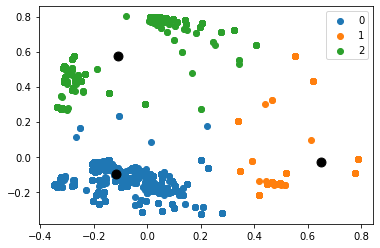

In [41]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [42]:
predictedkm3 = pd.DataFrame(label)
predictedkm3

,0
0,2
1,0
2,1
3,0
4,0
...,...
10769,0
10770,0
10771,1
10772,0


0
0    7706
1    1627
2    1441
Name: 0, dtype: int64


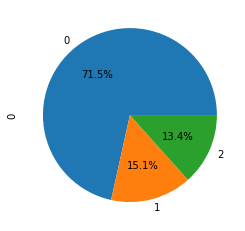

In [43]:
# Visualising the predicted values of cluster using pie chart
predictcount2 = predictedkm3.groupby([0])[0].count()
print(predictcount2)
Resultkm3= predictedkm3.groupby(0)[0].count().plot(kind='pie', autopct='%1.1f%%')
#Resultkm3= predictedkm3.groupby(0)[0].count().plot(kind='Bar', autopct='%1.1f%%')

In [44]:
scorekm = silhouette_score(df,label)
scorekm

0.7017736409081262

In [45]:
km_ending_time = datetime.now()
print("km end_time is - ", km_ending_time)
# Print the total time spend to run the kmeans clustering 
km_totaltime = km_ending_time - km_starting_time
print("Total time to run the Kmeans is {}".format(km_totaltime))

km end_time is -  2022-08-24 11:58:46.318871
Total time to run the Kmeans is 0:00:38.602384


### The score move close  towards 1 so the clustering in k-means  is good.

#Hence k=4 can be considered a good number of the cluster to cluster this data.

# we have seen that I have achieved  with low  value of inertia so this k means is the best  fit.



# Hierachial Clustering (Agglomerative )

In [46]:
df

array([[-0.30184805,  0.27065278],
       [ 0.05338397, -0.31123784],
       [ 0.78857194, -0.01496067],
       ...,
       [ 0.78857194, -0.01496067],
       [-0.14386625, -0.02113743],
       [-0.06040926, -0.11956416]])

In [47]:
#To set the recurssion limit
sys.setrecursionlimit(100000)

In [48]:
# To check the performance of Agglomerative clustering
ag_starting_time = datetime.now()
print("ag start_time is - ", ag_starting_time)

ag start_time is -  2022-08-24 11:59:01.966258


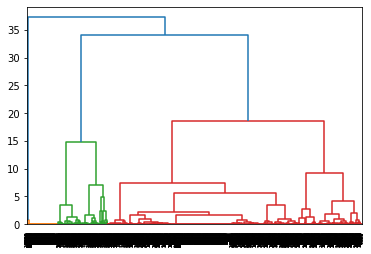

In [49]:
df_data = pd.DataFrame(df)
X = df_data.values
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

####In the above output , we can broadly see three big dendrograms followed by multiple smaller dendrograms.

In [50]:
#from sklearn.cluster import AgglomerativeClustering
ag = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
label1= ag.fit_predict(df)

In [51]:
print(label1)

[2 0 1 ... 1 0 0]


In [52]:
#Getting unique labels
unique_labels = np.unique(label1)
unique_labels

array([0, 1, 2])

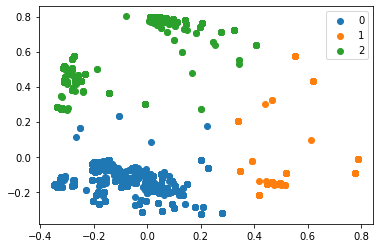

In [53]:
#plotting the results:
for i in unique_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [54]:
predictedag = pd.DataFrame(label1)
predictedag

,0
0,2
1,0
2,1
3,0
4,0
...,...
10769,0
10770,0
10771,1
10772,0


0
0    8202
1    1014
2    1558
Name: 0, dtype: int64


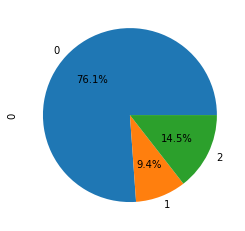

In [55]:
# Visualising the predicted values of cluster using pie chart
predictcount3 = predictedag.groupby([0])[0].count()
print(predictcount3)
Resultag= predictedag.groupby(0)[0].count().plot(kind='pie', autopct='%1.1f%%')
#Resultkm3= predictedkm3.groupby(0)[0].count().plot(kind='Bar', autopct='%1.1f%%')

In [56]:
scoreag = silhouette_score(df,label1)
scoreag

0.6720677529986027

In [57]:
ag_ending_time = datetime.now()
print("ag end_time is - ", ag_ending_time)
# Print the total time spend to run the basic model   
ag_totaltime = ag_ending_time - ag_starting_time
print("Total time to run the agglomerative clustering is {}".format(ag_totaltime))

ag end_time is -  2022-08-24 12:04:53.511328
Total time to run the agglomerative clustering is 0:05:51.545070


In [58]:
# the clusters are formed good whereas, the performance of the model takes more than 20 mins so this is not the good fit for the final predictions 

# DBSCAN Clustering (Density-Based Spatial Clustering of Applications with Noise)

##We can now create a DBSCAN object and fit the data. We defining the eps = 0.4 and min_samples = 5##

In [59]:
db_starting_time = datetime.now()
print("db start_time is - ", db_starting_time)

db start_time is -  2022-08-24 12:05:06.540237


In [60]:
#Creating Nearest Neighbor list with respect to their index number
nbrs = NearestNeighbors(n_neighbors=3).fit(df) #Applying nearest neighbors on df data
distances, indices = nbrs.kneighbors(df) #Extracting euclidean distance and index numbers

In [61]:
#Checking distance (1st Nearest Distance and 2nd Nearest Distance)
distances

array([[0.00000000e+00, 9.70175491e-15, 9.70175491e-15],
       [0.00000000e+00, 1.00211178e-15, 1.00211178e-15],
       [0.00000000e+00, 5.15174906e-16, 5.15174906e-16],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

###0.00 is a euclidean distance from core point to core point which is a zero
##2.22580198e-13 is a euclidean distance from core point to 1st nearest distance point SQRT((X0 - X4)^2 + (Y0 - Y4)^2)
##2.22580198e-13 is a euclidean distance from core point to 2nd nearest distance point SQRT((X0 - X16)^2 + (Y0 - Y16)^2)
##So this is a distance point list from core point to core point, core point to 1st nearest point & core point to 2nd nearest point.

In [62]:
#Checking Index
#This is a index numbers list with repect to the distances which We have calculated above.
indices

array([[   0, 9166, 6668],
       [   1, 3658, 2521],
       [   2, 1523, 1535],
       ...,
       [  34,   32,   55],
       [ 175,   36,   58],
       [1395,  444, 2428]])

In [63]:
#Sorting the 2nd nearest distance values in descending order
distanceDec = sorted(distances[:,2], reverse=True)
distanceDec

[0.20931574106133916,
 0.15449419131184228,
 0.12584909234966873,
 0.11835235002395966,
 0.11835235002395966,
 0.10165398605668123,
 0.10165398605668123,
 0.10165398605668123,
 0.08909692344822591,
 0.07565338974852906,
 0.07565338974852906,
 0.05405822975647691,
 0.05405822975647691,
 0.052461713673988254,
 0.052461713673988254,
 0.052461713673988254,
 0.048156632199748584,
 0.048156632199748584,
 0.04783142494799553,
 0.04783142494799553,
 0.04126453611191192,
 0.04126453611191192,
 0.04110535797034878,
 0.04110535797034878,
 0.03239929294279439,
 0.03213706445148507,
 0.03213706445148507,
 0.031009280457393627,
 0.031009280457393627,
 0.031009280457393627,
 0.02769987858647867,
 0.027464339432555777,
 0.027464339432555777,
 0.023314524764878247,
 0.023314524764878247,
 0.023314524764878247,
 0.022918575987566782,
 0.022918575987566782,
 0.02280444501338612,
 0.02280444501338612,
 0.021723674044536966,
 0.021723674044536966,
 0.019774257387528214,
 0.019023937518071347,
 0.0190239375

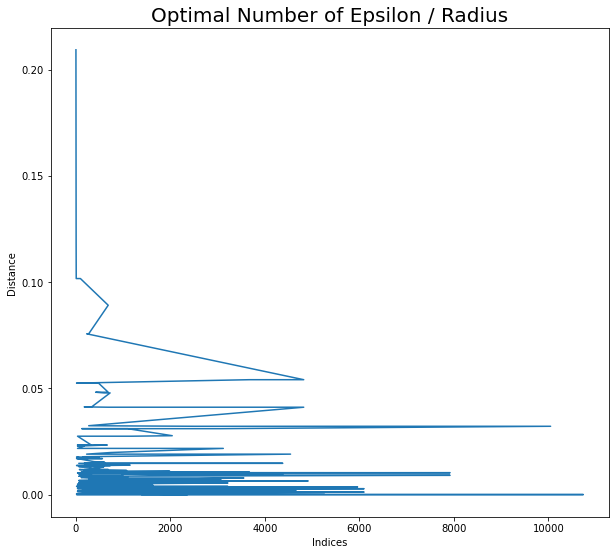

In [64]:
#Ploting 2nd nearest distance with index
plt.figure(figsize = (10,9))
plt.plot(indices[:,0],distanceDec);
plt.xlabel('Indices')
plt.ylabel('Distance')
plt.title('Optimal Number of Epsilon / Radius', fontsize = 20)
plt.show()

### As per graph, It indicates that 0.10 is the optimal point, to find the value of epislon 

In [65]:
#Implementing DBSCAN
db = DBSCAN(eps = 0.10, min_samples=5).fit(df)
y_pred = db.fit_predict(df)

In [66]:
#Checking the cluster labels generated from DBSCAN
labeldb = db.labels_
labeldb

array([0, 1, 2, ..., 2, 1, 1])

In [67]:
#Getting unique labels
 
unique_db = np.unique(labeldb)
unique_db

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [68]:
#Creating zeros arrays in boolean equivalent to core points of the labels
core_samples_mask = np.zeros_like(labeldb, dtype = bool) 
core_samples_mask

array([False, False, False, ..., False, False, False])

In [69]:
#Getting the index number of the core points 
db.core_sample_indices_

array([    0,     1,     2, ..., 10771, 10772, 10773])

In [70]:
#Marking core points as True in core_samples_mask
core_samples_mask[db.core_sample_indices_] = True

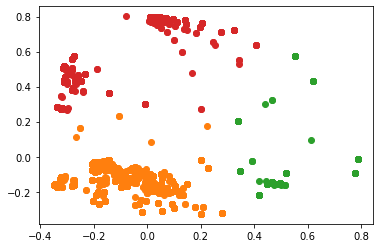

In [71]:
#plotting the results:
for i in unique_db:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
#plt.legend()
#plt.legend(loc = "lower left")
# add legends and set its box position
plt.show()

#As per the visualization from the above graph, We can easy observe the outliers and formed a clusters

In [72]:
predicteddb = pd.DataFrame(labeldb)
predicteddb

,0
0,0
1,1
2,2
3,1
4,1
...,...
10769,1
10770,1
10771,2
10772,1


0
-1       17
 0      757
 1     7665
 2     1014
 3      633
 4      502
 5       59
 6       40
 7       42
 8       34
 9        5
 10       6
Name: 0, dtype: int64


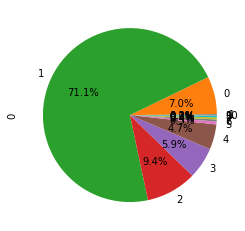

In [73]:
# Visualising the predicted values of cluster using pie chart
predictcountdb = predicteddb.groupby([0])[0].count()
print(predictcountdb)
Resultag= predicteddb.groupby(0)[0].count().plot(kind='pie', autopct='%1.1f%%')
#Resultkm3= predictedkm3.groupby(0)[0].count().plot(kind='Bar', autopct='%1.1f%%')

In [74]:
scoredb = silhouette_score(df,y_pred)
scoredb

0.5629536214432119

In [75]:
#Printing estimated number of cluster and noise
N_clus=len(set(labeldb))-(1 if -1 in labeldb else 0)
print('Estimated number of clusters: %d' % N_clus)
n_noise = list(labeldb).count(-1)
print('Estimated number of noise points: %d' % n_noise) 

Estimated number of clusters: 11
Estimated number of noise points: 17


##My model received a Silhouette Coefficient score of 55%. This indicates that DBSCAN  have overlapping clusters or mislabeled data points.

In [76]:
db_ending_time = datetime.now()
print("db end_time is - ", db_ending_time)
# Print the total time spend to run the basic model   
db_totaltime = db_ending_time - db_starting_time
print("Total time to run the DBScan is {}".format(db_totaltime))

## Agglomeraativeclustering will be the best model for the dataset as it has the best score.

db end_time is -  2022-08-24 12:05:55.654961
Total time to run the DBScan is 0:00:49.114724


## GaussianMixture Model 

In [77]:
gmm_starting_time = datetime.now()
print("gmm start_time is - ", gmm_starting_time)

gmm start_time is -  2022-08-24 12:05:57.702473


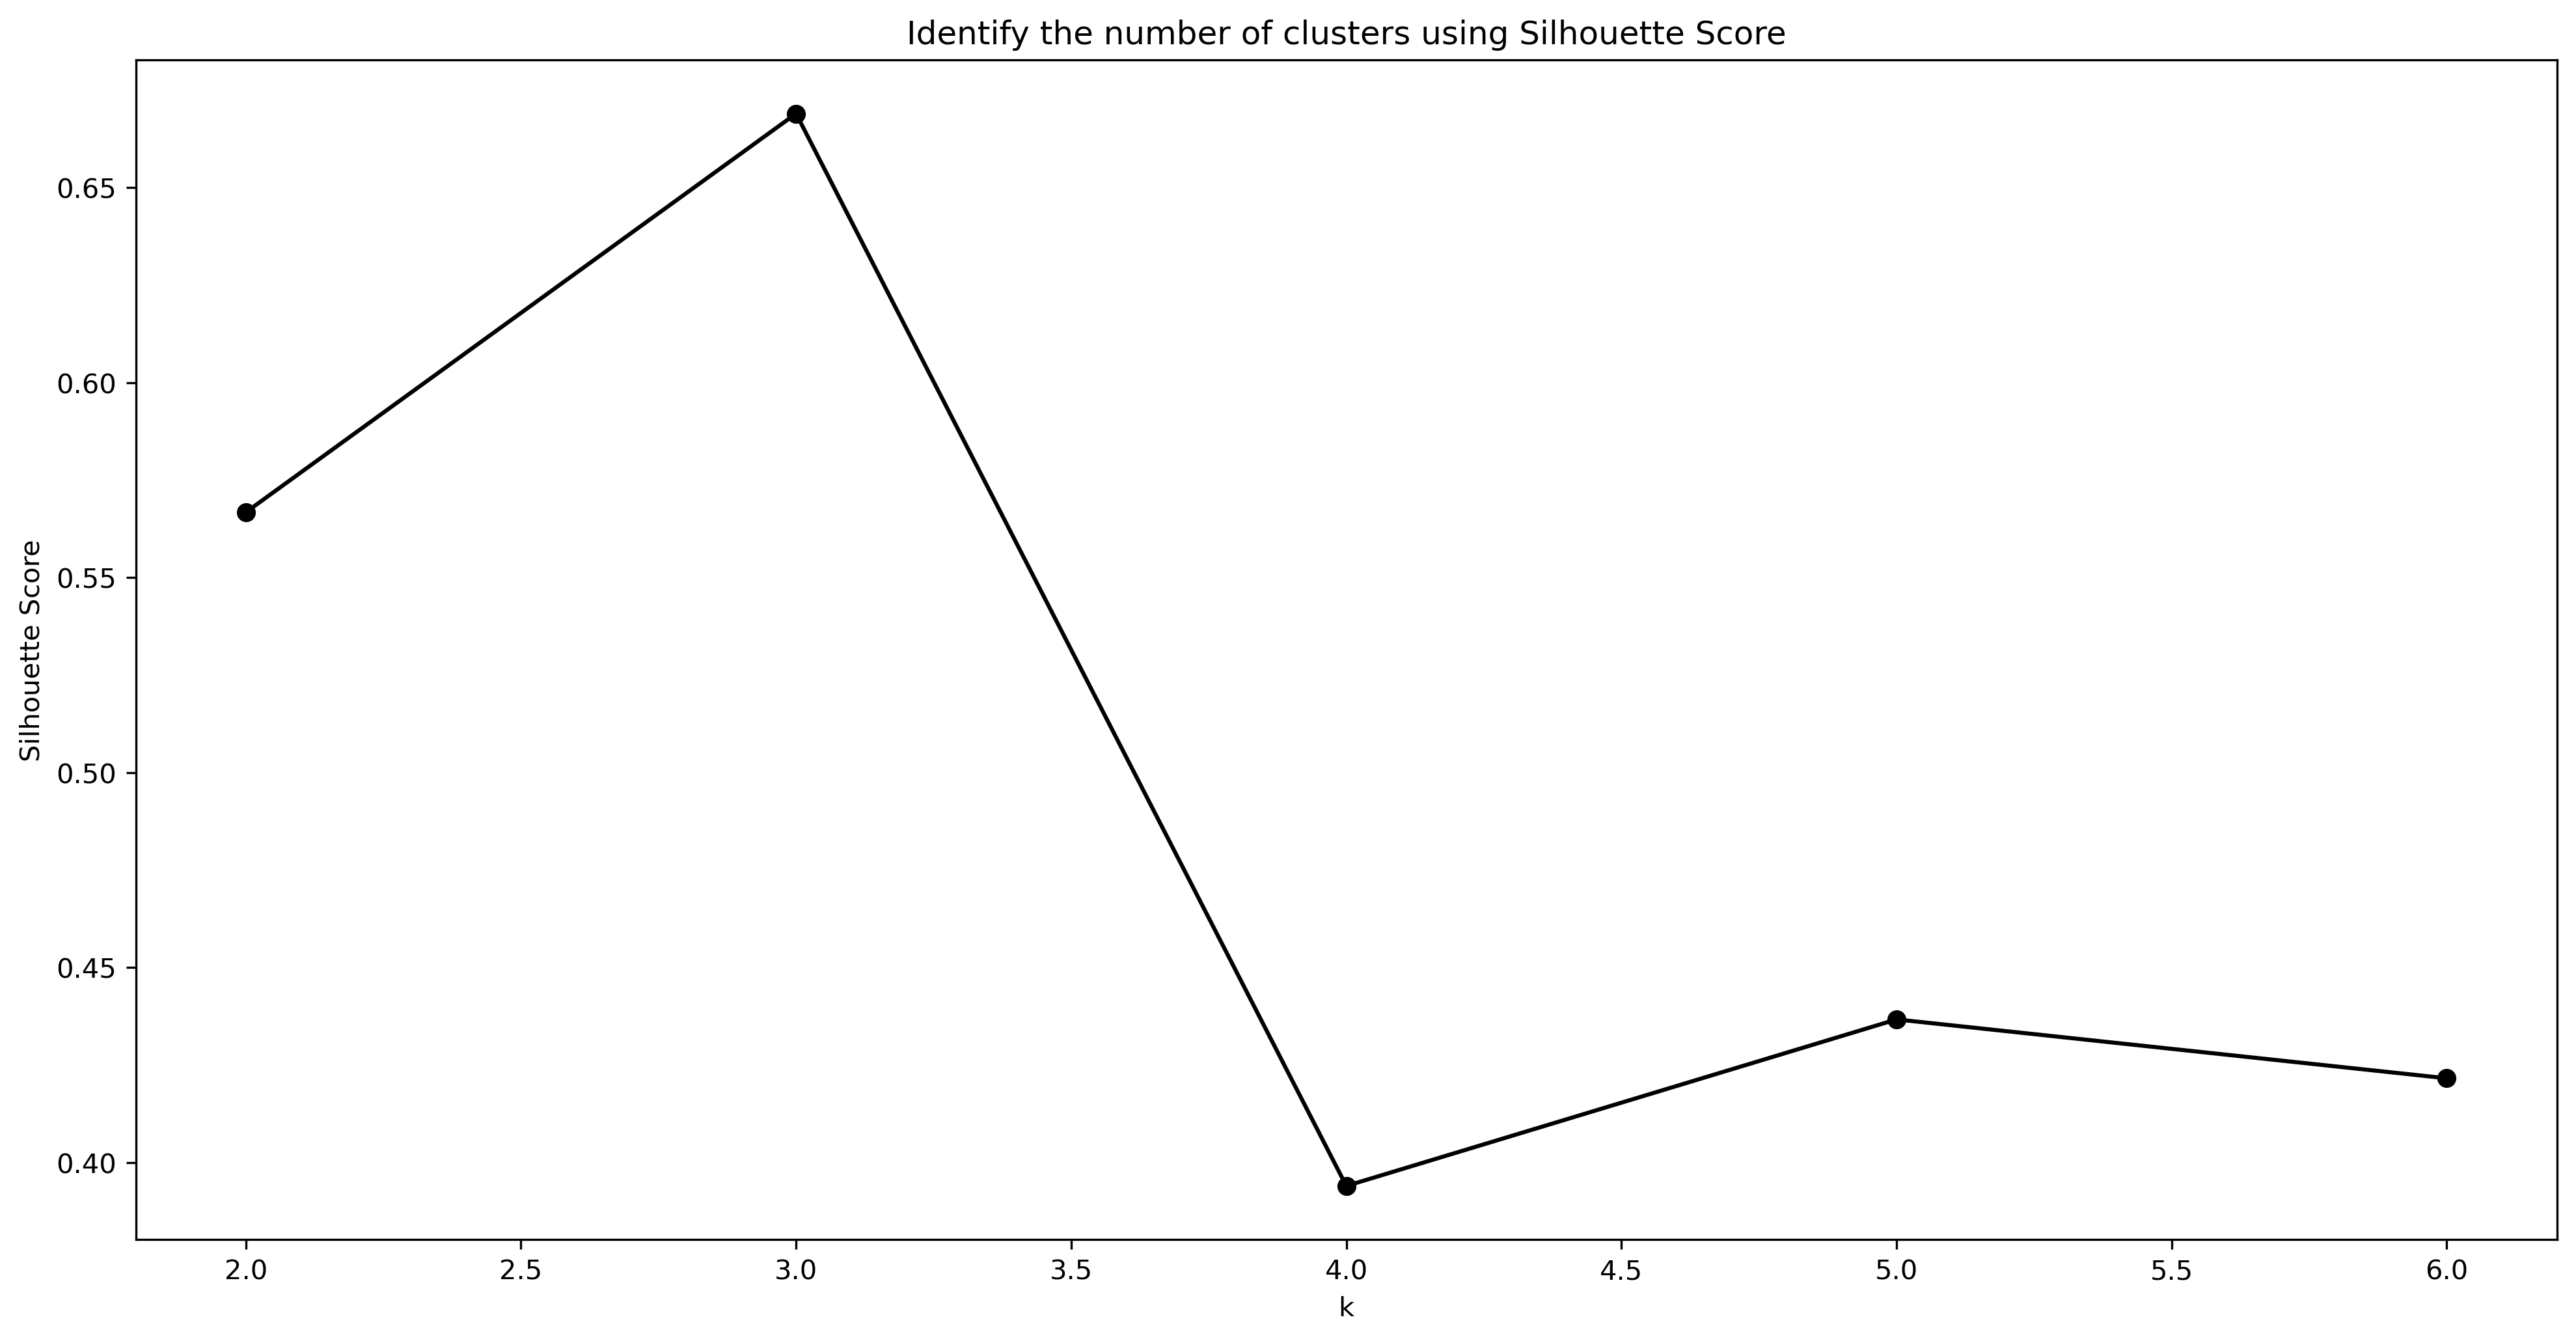

In [78]:
# Create empty list
S=[]

# Range of clusters to try (2 to 6)
K = (2,3,4,5,6)

# Select data for clustering model
#X = df_loc[['Latitude', 'Longitude']]

for k in K:
    # Set the model and its parameters
    modelgm = GaussianMixture(n_components=k, n_init=20, init_params='kmeans')
    # Fit the model 
    labelsgm = modelgm.fit_predict(df)
    # Calculate Silhoutte Score and append to a list
    S.append(metrics.silhouette_score(df, labelsgm, metric='euclidean'))

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,8), dpi=300)
plt.plot(K, S, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score')
plt.show()

## Generally, the higher the Silhouette score, the better defined your clusters are. In this  I choose to have 3 clusters 

In [79]:
# Set the model and its parameters - 3 clusters
gmm_model = GaussianMixture(n_components=3, # this is the number of clusters
                         covariance_type='full', # {‘full’, ‘tied’, ‘diag’, ‘spherical’}, default=’full’
                         max_iter=100, # the number of EM iterations to perform. default=100
                         n_init=1, # the number of initializations to perform. default = 1
                         init_params='kmeans', # the method used to initialize the weights, the means and the precisions. {'random' or default='k-means'}
                         verbose=0, # default 0, {0,1,2}
                         random_state=1 # for reproducibility
                        )

# Fit the model and predict labels
clust4 = gmm_model.fit(df)
labels4 = gmm_model.predict(df)

In [80]:
#Getting unique labels
unique_labelsgmm = np.unique(labels4)
unique_labelsgmm

array([0, 1, 2])

In [81]:
df_new = pd.DataFrame(df)
df_new['labels'] = labels4

In [82]:
#df['labels4']= labels4
d0 = df_new[df_new['labels']== 0]
d1 = df_new[df_new['labels']== 1]
d2 = df_new[df_new['labels']== 2]

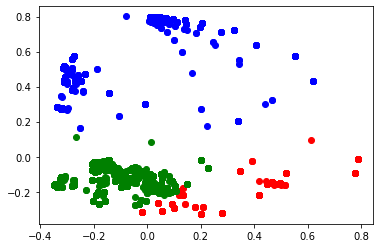

In [83]:
# plot three clusters in same plot
plt.scatter(d0[0], d0[1], c ='r')
plt.scatter(d1[0], d1[1], c ='blue')
plt.scatter(d2[0], d2[1], c ='g')

In [84]:
scoregmm = silhouette_score(df,labels4)
scoregmm

0.6665023950046974

In [85]:
db_ending_time = datetime.now()
print("db end_time is - ", db_ending_time)
# Print the total time spend to run the basic model   
db_totaltime = db_ending_time - db_starting_time
print("Total time to run the DBScan is {}".format(db_totaltime))

db end_time is -  2022-08-24 12:06:35.355931
Total time to run the DBScan is 0:01:28.815694


In [86]:
### In GMM the clusters are not formed effectively, so this model is not the best fit 

## Simple neural network

In [95]:
from keras.layers import Dense, Dropout
model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) # Add an input shape! (features,)
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [96]:
# compile the model
model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [97]:
X = np.asarray(df).astype('float32').reshape((-1,1))
Y = np.asarray(dense_test).astype('float32').reshape((-1,1))
classifier_nn = model.fit(X,X, epochs=10,verbose=True,validation_data=(Y,Y),batch_size=1)

Epoch 1/10
21548/21548 [==============================] - 38s 2ms/step - loss: -4666.9004 - accuracy: 0.0000e+00 - val_loss: 642.0128 - val_accuracy: 0.8148
Epoch 2/10
21548/21548 [==============================] - 37s 2ms/step - loss: -51724.5039 - accuracy: 0.0000e+00 - val_loss: 3862.2200 - val_accuracy: 0.8148
Epoch 3/10
21548/21548 [==============================] - 33s 2ms/step - loss: -195929.8594 - accuracy: 0.0000e+00 - val_loss: 11730.7637 - val_accuracy: 0.8148
Epoch 4/10
21548/21548 [==============================] - 34s 2ms/step - loss: -489862.1562 - accuracy: 0.0000e+00 - val_loss: 25666.9688 - val_accuracy: 0.8148
Epoch 5/10
21548/21548 [==============================] - 32s 1ms/step - loss: -983781.4375 - accuracy: 0.0000e+00 - val_loss: 47530.7109 - val_accuracy: 0.8148
Epoch 6/10
21548/21548 [==============================] - 32s 1ms/step - loss: -1731750.0000 - accuracy: 0.0000e+00 - val_loss: 79958.9141 - val_accuracy: 0.8148
Epoch 7/10
21548/21548 [===============

## This model predict higher loss and it is not correct model to fit the data

## K means is the best model for the given dataset with respect to performance, score and how effectively clusters formed.

In [98]:
import pickle
# save the model to disk
filename = 'kmeans.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [99]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)
loaded_model

KMeans(n_clusters=3)

In [100]:
kmeansfinal_starting_time = datetime.now()
print("kmeans start_time is - ", kmeansfinal_starting_time)

kmeans start_time is -  2022-08-24 12:14:05.643390


In [101]:
#Initialize the class object
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label_2 = kmeans.fit_predict(dense_test)
 
arr3 = label_2
arr3

/Users/sanjukarthick/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


array([2, 0, 1, 1, 1, 1, 2, 2, 0, 1, 2, 1, 2, 0, 1, 0, 2, 1, 1, 0, 1, 0,
       1, 0, 0, 2, 2, 1, 1, 2, 0, 1, 1, 0, 2, 1, 1, 1, 2, 0, 1, 2, 0, 2,
       1, 2, 1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 1, 1, 2, 2, 1, 0, 1, 1, 2,
       2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 1, 1, 1, 0, 1, 2,
       2, 1, 1, 0, 1, 0, 0, 1, 2, 1, 0, 1, 1, 2, 1, 2, 1, 2, 0, 0, 1, 1,
       1, 2, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0,
       2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 0, 2, 1, 1, 2, 1, 0, 2, 2, 1, 2, 0,
       0, 1, 1, 1, 2, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 2,
       1, 0, 2, 1, 1, 1, 2, 1, 0, 0, 0, 0, 1, 2, 2, 1, 0, 2, 1, 1, 1, 0,
       2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0,
       1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 1, 2, 2, 2, 2, 1, 0, 1, 1, 1, 2, 0, 0, 0, 2, 2, 1, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 1, 0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 1, 0, 1, 1,
       2, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0, 0, 1,

In [102]:
# To reshape the array to (-1, 1) to predict the new values 
arr4 = arr3.reshape(-1, 1)
print ('After reshaping having dimension 2x4:')
print (arr4)
print ('\n')

After reshaping having dimension 2x4:
[[2]
 [0]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [0]
 [1]
 [2]
 [1]
 [2]
 [0]
 [1]
 [0]
 [2]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [2]
 [2]
 [1]
 [1]
 [2]
 [0]
 [1]
 [1]
 [0]
 [2]
 [1]
 [1]
 [1]
 [2]
 [0]
 [1]
 [2]
 [0]
 [2]
 [1]
 [2]
 [1]
 [2]
 [2]
 [1]
 [2]
 [2]
 [2]
 [0]
 [0]
 [2]
 [0]
 [1]
 [1]
 [2]
 [2]
 [1]
 [0]
 [1]
 [1]
 [2]
 [2]
 [1]
 [1]
 [2]
 [2]
 [1]
 [2]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [2]
 [2]
 [2]
 [1]
 [1]
 [1]
 [0]
 [1]
 [2]
 [2]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [2]
 [1]
 [0]
 [1]
 [1]
 [2]
 [1]
 [2]
 [1]
 [2]
 [0]
 [0]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [1]
 [0]
 [1]
 [1]
 [1]
 [2]
 [0]
 [2]
 [2]
 [2]
 [1]
 [2]
 [2]
 [1]
 [2]
 [2]
 [2]
 [0]
 [2]
 [1]
 [2]
 [1]
 [1]
 [1]
 [2]
 [2]
 [1]
 [1]
 [0]
 [2]
 [1]
 [1]
 [2]
 [1]
 [0]
 [2]
 [2]
 [1]
 [2]
 [0]
 [0]
 [1]
 [1]
 [1]
 [2]
 [2]
 [1]
 [2]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [2]
 [1]
 [0]
 [2]
 [1]
 [1]
 [1]
 [2]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [2]
 [2]
 [1]
 [

In [103]:
#Getting unique labels
unique1_labelskm = np.unique(arr4)
unique1_labelskm

array([0, 1, 2], dtype=int32)

In [104]:
# new instances where we do not know the answer
ynew = loaded_model.fit_predict(arr4)

np.random.seed(0)
Predlist = []
# show the inputs and predicted outputs
for i in range(len(arr4)):
    print("X=%s, Predicted=%s" % (arr4[i], ynew[i]))
    Predlist.append({'X':arr4[i], 'Predicted':ynew[i] })
    
dfpred1 = pd.DataFrame(Predlist)
Predicted =dfpred1.to_csv('Predlist.csv')   
#Predicted =dfpred1.to_csv('Prelist.csv') 

X=[2], Predicted=0
X=[0], Predicted=2
X=[1], Predicted=1
X=[1], Predicted=1
X=[1], Predicted=1
X=[1], Predicted=1
X=[2], Predicted=0
X=[2], Predicted=0
X=[0], Predicted=2
X=[1], Predicted=1
X=[2], Predicted=0
X=[1], Predicted=1
X=[2], Predicted=0
X=[0], Predicted=2
X=[1], Predicted=1
X=[0], Predicted=2
X=[2], Predicted=0
X=[1], Predicted=1
X=[1], Predicted=1
X=[0], Predicted=2
X=[1], Predicted=1
X=[0], Predicted=2
X=[1], Predicted=1
X=[0], Predicted=2
X=[0], Predicted=2
X=[2], Predicted=0
X=[2], Predicted=0
X=[1], Predicted=1
X=[1], Predicted=1
X=[2], Predicted=0
X=[0], Predicted=2
X=[1], Predicted=1
X=[1], Predicted=1
X=[0], Predicted=2
X=[2], Predicted=0
X=[1], Predicted=1
X=[1], Predicted=1
X=[1], Predicted=1
X=[2], Predicted=0
X=[0], Predicted=2
X=[1], Predicted=1
X=[2], Predicted=0
X=[0], Predicted=2
X=[2], Predicted=0
X=[1], Predicted=1
X=[2], Predicted=0
X=[1], Predicted=1
X=[2], Predicted=0
X=[2], Predicted=0
X=[1], Predicted=1
X=[2], Predicted=0
X=[2], Predicted=0
X=[2], Predi

In [105]:
dfpred1

,X,Predicted
0,[2],0
1,[0],2
2,[1],1
3,[1],1
4,[1],1
...,...,...
562,[2],0
563,[2],0
564,[0],2
565,[1],1


In [106]:
finaldata = pd.concat([predict_data, dfpred1], axis = 1)
finaldata

,Sentence,Label,X,Predicted
0,distinct,1,[2],0
1,select * from users where id = 1 union sele...,1,[0],2
2,"select * from users where id = 1 or "".]"" or...",1,[1],1
3,"select * from users where id = 1 or 1#""? or...",1,[1],1
4,declare @q nvarchar ( 200 ) select @q ...,1,[1],1
...,...,...,...,...
562,1' in boolean mode ) procedure analyse ( ...,1,[2],0
563,1' ) as idqc where 5288 = 5288 and elt (...,1,[2],0
564,1 ) ) ) union all select null--,1,[0],2
565,"1"" ) rlike ( select * from ( select ...",1,[1],1


# Identifying the types of SQLI Attacks 

In [107]:
# Select predicted columns containing value 0
filter0 = finaldata.loc[finaldata['Predicted'] == 0]
filter0

,Sentence,Label,X,Predicted
0,distinct,1,[2],0
6,"admin"" or ""1"" = ""1""/*",1,[2],0
7,or 3 = 3,1,[2],0
10,||UTL_HTTP.REQUEST,1,[2],0
12,"exec sp_addlogin 'name' , 'password'",1,[2],0
...,...,...,...,...
557,1' ) as mara where 7164 = 7164,1,[2],0
559,1' ) ) as joco where 2922 = 2922,1,[2],0
562,1' in boolean mode ) procedure analyse ( ...,1,[2],0
563,1' ) as idqc where 5288 = 5288 and elt (...,1,[2],0


In [108]:
##The UNION keyword execute one or more additional SELECT queries and append the results to the original query
for ind in filter0.index:
    print(filter0['Sentence'][ind])

distinct
admin" or "1"  =  "1"/*
or 3  =  3
||UTL_HTTP.REQUEST
exec sp_addlogin 'name' , 'password'
admin'  )   or   (  '1'  =  '1'--
!
" or ""-"
"&"
 (  sqlvuln  ) 
1"  )   as ztkr where 1532  =  1532
call regexp_substring  (  repeat  (  right  (  char  (  3702  )  ,0  )  ,500000000  )  ,null  )   and    (    (   4142  =  4142
1'   )    )    rlike sleep  (  5  )   and    (    (   'iwct'  =  'iwct
1"  )   as duvm where 6190  =  6190 order by 1--
-5918'  )   as olzc where 5992  =  5992 or 4390  =  9085
1'   )    )    or char  (  117  )  ||char  (  111  )  ||char  (  105  )  ||char  (  100  )    =  regexp_substring  (  repeat  (  left  (  crypt_key  (  char  (  65  )  ||char  (  69  )  ||char  (  83  )  ,null  )  ,0  )  ,500000000  )  ,null  )   and    (    (   'acly' like 'acly
1'  )   and 9198  =  9198--
1' where 5702  =  5702 and elt  (  3114  =  3114,sleep  (  5   )    )   #
1%"  )   and   (  3020  =  3020  )  *6703 and   (  "%"  =  "
1   )    )    as mlpf where 7425  =  7425
1 where

In [109]:
# Select predicted columns containing value 1
filter1 = finaldata.loc[finaldata['Predicted'] == 1]
filter1

,Sentence,Label,X,Predicted
2,"select * from users where id = 1 or "".]"" or...",1,[1],1
3,"select * from users where id = 1 or 1#""? or...",1,[1],1
4,declare @q nvarchar ( 200 ) select @q ...,1,[1],1
5,"select * from users where id = 1 or "", ( ...",1,[1],1
9,AND 1 = utl_inaddr.get_host_address ( ...,1,[1],1
...,...,...,...,...
554,"-2605"" ) or 4493 = utl_inaddr.get_host_ad...",1,[1],1
556,-4979' ) ) or 4493 = utl_inaddr.get_...,1,[1],1
560,"1' ) ) and extractvalue ( 7982,conca...",1,[1],1
561,1'+ ( select somn where 8636 = 8636 rlike ...,1,[1],1


In [110]:
## predicted based on True or False is boolean based. 
for ind in filter1.index:
    print(filter1['Sentence'][ind])

 select * from users where id  =  1 or ".]" or 1  =  1 -- 1
 select * from users where id  =  1 or 1#"? or 1  =  1 -- 1
declare @q nvarchar   (  200  )   select @q   =   0x770061 ...
 select * from users where id  =  1 or ",  (  " or 1  =  1 -- 1
 AND 1  =  utl_inaddr.get_host_address   (    (   SELECT DISTINCT  (  column_name  )   FROM   (  SELECT DISTINCT  (  column_name  )  , ROWNUM AS LIMIT FROM all_tab_columns  )   WHERE LIMIT  =  1   )    )    AND 'i'  =  'i
 AND 1  =  utl_inaddr.get_host_address   (    (   SELECT DISTINCT  (  table_name  )   FROM   (  SELECT DISTINCT  (  table_name  )  , ROWNUM AS LIMIT FROM sys.all_tables  )   WHERE LIMIT  =  1   )    )    AND 'i'  =  'i
 select * from users where id  =  1 or "1]" or 1  =  1 -- 1
 select * from users where id  =  1 or 1#",  =  1 or 1  =  1 -- 1
 AND 1  =  utl_inaddr.get_host_address   (    (   SELECT DISTINCT  (  PASSWORD  )   FROM   (  SELECT DISTINCT  (  PASSWORD  )  , ROWNUM AS LIMIT FROM SYS.USER$  )   WHERE LIMIT  =  4   )

In [111]:
# Select predicted columns containing value 2
filter2 = finaldata.loc[finaldata['Predicted'] == 2]
filter2

,Sentence,Label,X,Predicted
1,select * from users where id = 1 union sele...,1,[0],2
8,select * from users where id = 1 union sele...,1,[0],2
13,select * from users where id = 1 + \+*\ uni...,1,[0],2
15,"select * from users where id = 1 or 1#""? un...",1,[0],2
19,select * from users where id = '1' + @<@# u...,1,[0],2
...,...,...,...,...
535,"1%' ) ) union all select null,null,nul...",1,[0],2
542,"1 where 1186 = 1186 union all select null,nu...",1,[0],2
551,"1"" where 6325 = 6325 union all select null,n...",1,[0],2
558,"-9408%"" ) ) union all select 1841,1841...",1,[0],2


In [112]:
#Getting the information based on the Error based 
for ind in filter2.index:
    print(filter2['Sentence'][ind])

 select * from users where id  =  1 union select @ $_,version  (    )   -- 1
 select * from users where id  =  1 union select .1$_,version  (    )   -- 1
 select * from users where id  =  1 + \+*\ union select null,@@VERSION -- 1
 select * from users where id  =  1 or 1#"? union select 1,version  (    )   -- 1
 select * from users where id  =  '1' + @<@# union select 1,version  (    )   -- 1'
 union   (  select NULL, NULL, NULL, NULL,    (  select @@version   )    )    --
 select * from users where id  =  1.%@ union select 1,version  (    )   -- 1
 select * from users where id  =  1 +$+ union select null,@@VERSION -- 1
 select * from users where id  =  '1' or \.<$ union select 1,@@VERSION -- 1'
 select * from users where id  =  1 or 1#"@ union select 1,version  (    )   -- 1
-9508  )   union all select 9950,9950,9950,9950,9950,9950,9950#
1"   )    )     )   union all select null,null,null,null,null--
-3513%" union all select 8473,8473#
-6940'  )   union all select 3042,3042,3042,3042,3

In [113]:
sqlattacktype = list()
sqlattacktype.clear()
for index, each in finaldata.iterrows():
    #print (index, each)
    sent, label, X_value, pred = each
    #print(index)
    #print(sent)
    #print(label)
    #print(X_value)
    #print(pred)
    
    if pred == 0:
        attacktype = "Error Based"
        #print("Prediction is Blind Time Based SQL injection type")
    elif pred == 1:
        attacktype = "Boolean Based"
        #print("Predcition is Time based SQL injection type")
    elif pred == 2:
        attacktype = "union Based"
        #print("Prediction is union based SQL injection type")
    sqlattacktype.append({"Attack_Type": attacktype})
    

predicted_final = pd.DataFrame(sqlattacktype)
df_predictions = pd.concat([finaldata,predicted_final],axis =1)
df_predictions 

,Sentence,Label,X,Predicted,Attack_Type
0,distinct,1,[2],0,Error Based
1,select * from users where id = 1 union sele...,1,[0],2,union Based
2,"select * from users where id = 1 or "".]"" or...",1,[1],1,Boolean Based
3,"select * from users where id = 1 or 1#""? or...",1,[1],1,Boolean Based
4,declare @q nvarchar ( 200 ) select @q ...,1,[1],1,Boolean Based
...,...,...,...,...,...
562,1' in boolean mode ) procedure analyse ( ...,1,[2],0,Error Based
563,1' ) as idqc where 5288 = 5288 and elt (...,1,[2],0,Error Based
564,1 ) ) ) union all select null--,1,[0],2,union Based
565,"1"" ) rlike ( select * from ( select ...",1,[1],1,Boolean Based


Attack_Type
Boolean Based    243
Error Based      219
union Based      105
Name: Attack_Type, dtype: int64


<AxesSubplot:ylabel='Attack_Type'>

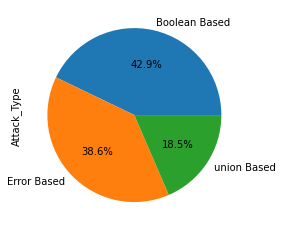

In [114]:
predcount1 = df_predictions.groupby(['Attack_Type'])['Attack_Type'].count()
print(predcount1)
df_predictions.groupby('Attack_Type')['Attack_Type'].count().plot(kind='pie', autopct='%1.1f%%')

In [115]:
kmeansfinal_ending_time = datetime.now()
print("kmeans end_time is - ", kmeansfinal_ending_time)
# Print the total time spend to run the basic model   
kmeans_totaltime = kmeansfinal_ending_time - kmeansfinal_starting_time
print("Total time to run the kmeansfinal is {}".format(kmeans_totaltime))

kmeans end_time is -  2022-08-24 12:18:17.399586
Total time to run the kmeansfinal is 0:04:11.756196
